# Projeto 9: Classificação de objetos (CIFAR-10)

- Base de dados: https://www.cs.toronto.edu/~kriz/cifar.html


# Etapa 1: Importação das bibliotecas

In [ ]:
#%tensorflow_version 2.x
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

# Etapa 2: Carregamento da base de dados

In [ ]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

# Etapa 3: Visualização dos dados

[1]


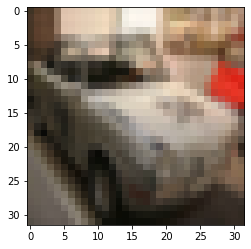

In [ ]:
i = 302
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


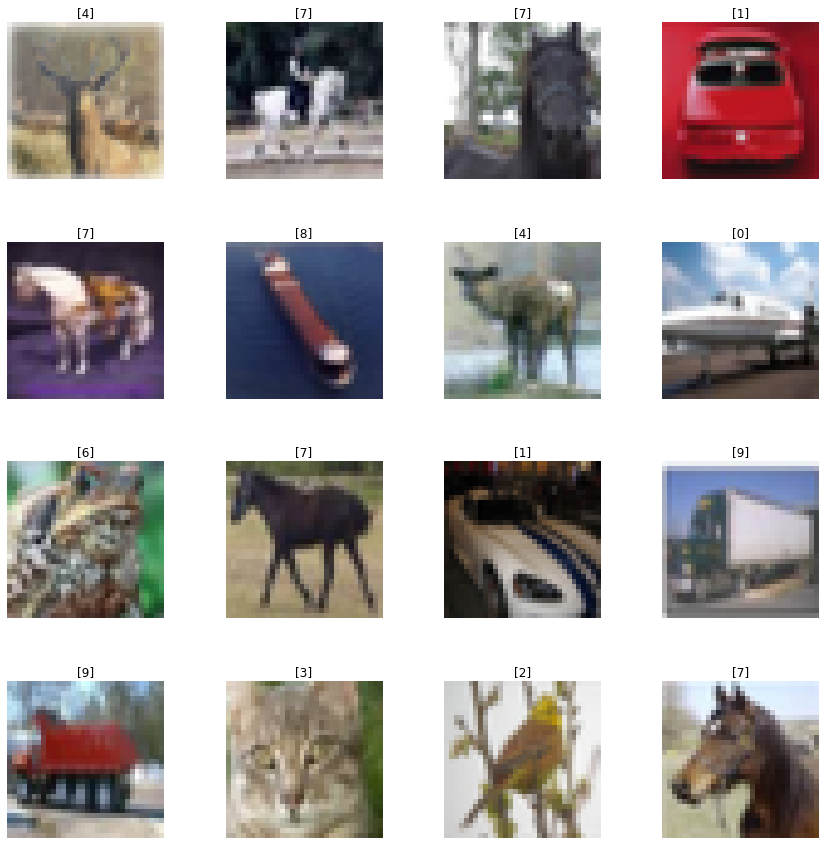

In [ ]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);

# Etapa 4: Preparação dos dados

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
number_cat = 10

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), # 0.0000006
            loss ='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
epochs = 100
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 222us/sample - loss: 2.1282 - accuracy: 0.2037
Epoch 2/100
50000/50000 [==============================] - 3s 60us/sample - loss: 1.8847 - accuracy: 0.3175
Epoch 3/100
50000/50000 [==============================] - 3s 59us/sample - loss: 1.7747 - accuracy: 0.3616
Epoch 4/100
50000/50000 [==============================] - 3s 61us/sample - loss: 1.6878 - accuracy: 0.3885
Epoch 5/100
50000/50000 [==============================] - 3s 60us/sample - loss: 1.6346 - accuracy: 0.4100
Epoch 6/100
50000/50000 [==============================] - 3s 60us/sample - loss: 1.5825 - accuracy: 0.4251
Epoch 7/100
50000/50000 [==============================] - 3s 60us/sample - loss: 1.5384 - accuracy: 0.4411
Epoch 8/100
50000/50000 [==============================] - 3s 60us/sample - loss: 1.4959 - accuracy: 0.4586
Epoch 9/100
50000/50000 [==============================] - 3s 60us/sample - loss: 1.4592 - accuracy: 0.4721
Epo

# Etapa 6: Avaliação do modelo

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 144us/sample - loss: 0.7148 - accuracy: 0.7633
Test Accuracy: 0.7633000016212463


In [ ]:
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

array([5, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

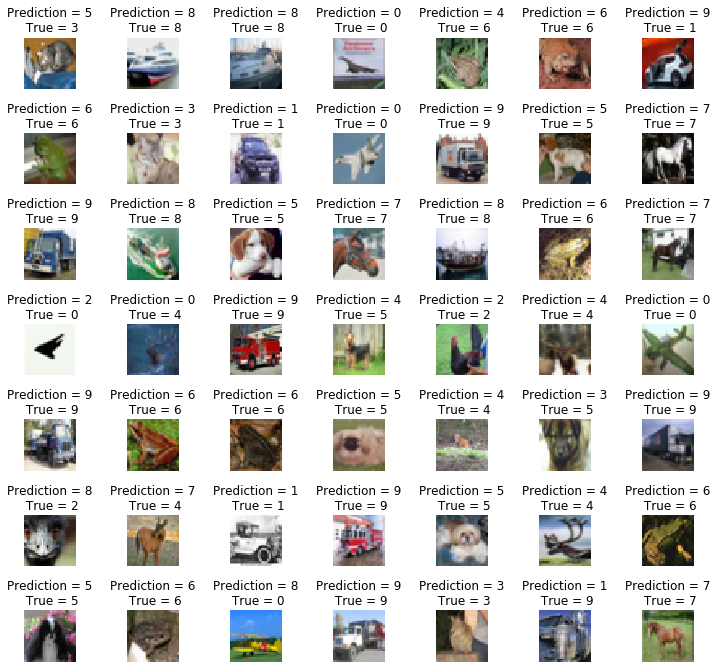

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

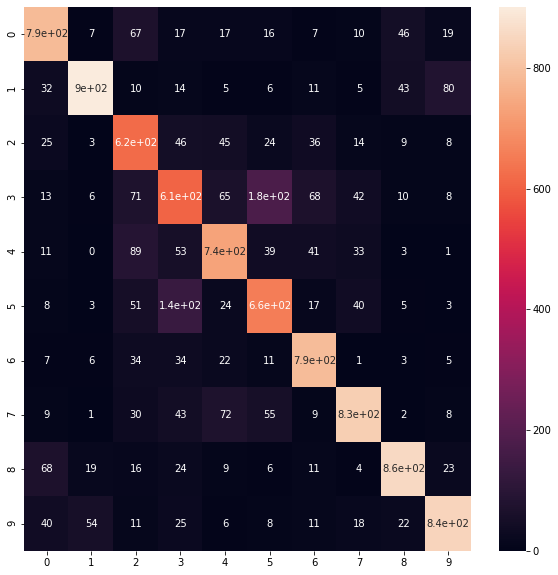

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
cm

array([[787,   7,  67,  17,  17,  16,   7,  10,  46,  19],
       [ 32, 901,  10,  14,   5,   6,  11,   5,  43,  80],
       [ 25,   3, 621,  46,  45,  24,  36,  14,   9,   8],
       [ 13,   6,  71, 607,  65, 177,  68,  42,  10,   8],
       [ 11,   0,  89,  53, 735,  39,  41,  33,   3,   1],
       [  8,   3,  51, 137,  24, 658,  17,  40,   5,   3],
       [  7,   6,  34,  34,  22,  11, 789,   1,   3,   5],
       [  9,   1,  30,  43,  72,  55,   9, 833,   2,   8],
       [ 68,  19,  16,  24,   9,   6,  11,   4, 857,  23],
       [ 40,  54,  11,  25,   6,   8,  11,  18,  22, 845]])